In [1]:
#pip install nltk

In [38]:
#pip install wordcloud

You should consider upgrading via the 'c:\miniconda\python.exe -m pip install --upgrade pip' command.


In [66]:
#pip install -U textblob

In [1]:
import nltk
from textblob import TextBlob
import re

In [64]:
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')

In [2]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [3]:
from nltk.tokenize import word_tokenize

In [4]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

In [5]:
from nltk.util import ngrams
from collections import Counter

In [6]:
import pandas as pd

In [ ]:
#embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [103]:
# Converts a text to 512 float columns, for use as input to a training model
#embeded_tweets = embed(dfbo['text_clean'].values.tolist()).numpy()

In [7]:
dfbo = pd.read_csv('C:\\Users\\dell pc\\Documents\\Chargepoint\\BarackObama.csv',encoding = "ISO-8859-1")

In [8]:
dfbo.head()

,created_at,text,url,replies,retweets,favorites,user
0,10/16/17 22:59,I'm grateful to @SenJohnMcCain for his lifetim...,https://twitter.com/BarackObama/status/9200615...,17064,89916,641842,BarackObama
1,10/2/17 12:41,Michelle &amp; I are praying for the victims i...,https://twitter.com/BarackObama/status/9148326...,21588,405895,1715753,BarackObama
2,9/30/17 2:22,Proud to cheer on Team USA at the Invictus Gam...,https://twitter.com/BarackObama/status/9139520...,8476,60651,503255,BarackObama
3,9/26/17 17:03,We're expanding our efforts to help Puerto Ric...,https://twitter.com/BarackObama/status/9127244...,10657,113807,334901,BarackObama
4,9/25/17 23:36,"Prosecutor, soldier, family man, citizen. Beau...",https://twitter.com/BarackObama/status/9124608...,3886,58449,328106,BarackObama


In [9]:
dfdt = pd.read_csv('C:\\Users\\dell pc\\Documents\\Chargepoint\\realDonaldTrump.csv',encoding = "ISO-8859-1")

In [10]:
dfdt.head()

,created_at,text,url,replies,retweets,favorites,user
0,10/23/17 12:30,I had a very respectful conversation with the ...,https://twitter.com/realDonaldTrump/status/922...,46228,10243,49468,realDonaldTrump
1,10/23/17 11:53,Two dozen NFL players continue to kneel during...,https://twitter.com/realDonaldTrump/status/922...,31419,14006,62406,realDonaldTrump
2,10/23/17 11:42,There will be NO change to your 401(k). This h...,https://twitter.com/realDonaldTrump/status/922...,9552,13719,62662,realDonaldTrump
3,10/22/17 12:08,It is finally sinking through. 46% OF PEOPLE B...,https://twitter.com/realDonaldTrump/status/922...,56238,25102,112890,realDonaldTrump
4,10/22/17 12:02,Wacky Congresswoman Wilson is the gift that ke...,https://twitter.com/realDonaldTrump/status/922...,32136,21573,97145,realDonaldTrump


In [11]:
dfbo.dtypes

created_at    object
text          object
url           object
replies        int64
retweets       int64
favorites      int64
user          object
dtype: object

In [27]:
str(dfbo['text'])

"0       I'm grateful to @SenJohnMcCain for his lifetim...\n1       Michelle &amp; I are praying for the victims i...\n2       Proud to cheer on Team USA at the Invictus Gam...\n3       We're expanding our efforts to help Puerto Ric...\n4       Prosecutor, soldier, family man, citizen. Beau...\n                              ...                        \n3202    Earning the minimum wage while raising a famil...\n3203    FACT: 97% of scientists and NASA accept the sc...\n3204    Getting covered made Jason so happy he wanted ...\n3205    It's time to get serious and #ActOnClimate. ht...\n3206    Happening now: President Obama is delivering a...\nName: text, Length: 3207, dtype: object"

In [12]:
emoji_pattern = re.compile("["
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

def replace_emojis(t):
    '''
    This replaces happy unicode emojis with "happy" and sad unicode emojis with "sad.
    '''
    emoji_happy = ["\U0001F600","\U0001F601","\U0001F602","\U0001F603","\U0001F604","\U0001F605","\U0001F606",
                 "\U0001F607","\U0001F609","\U0001F60A", "\U0001F642","\U0001F643","\U0001F923",r"\U0001F970",
                 "\U0001F60D", r"\U0001F929","\U0001F618","\U0001F617",r"\U000263A", "\U0001F61A", "\U0001F619",
                 r"\U0001F972", "\U0001F60B", "\U0001F61B", "\U0001F61C", r"\U0001F92A","\U0001F61D", 
                 "\U0001F911", "\U0001F917", r"\U0001F92D", r"\U0001F92B","\U0001F914","\U0001F910", 
                 r"\U0001F928", "\U0001F610", "\U0001F611","\U0001F636", "\U0001F60F","\U0001F612", 
                 "\U0001F644","\U0001F62C","\U0001F925","\U0001F60C","\U0001F614","\U0001F62A","\U0001F924",
                 "\U0001F634", "\U0001F920", r"\U0001F973", r"\U0001F978","\U0001F60E","\U0001F913", 
                 r"\U0001F9D0"]

    emoji_sad = ["\U0001F637","\U0001F912","\U0001F915","\U0001F922", r"\U0001F92E","\U0001F927", r"\U0001F975",
                 r"\U0001F976", r"\U0001F974","\U0001F635", r"\U0001F92F", "\U0001F615","\U0001F61F","\U0001F641",
                 r"\U0002639","\U0001F62E","\U0001F62F","\U0001F632","\U0001F633", r"\U0001F97A","\U0001F626",
                 "\U0001F627","\U0001F628","\U0001F630","\U0001F625","\U0001F622","\U0001F62D","\U0001F631",
                 "\U0001F616","\U0001F623"	,"\U0001F61E","\U0001F613","\U0001F629","\U0001F62B", r"\U0001F971",
                 "\U0001F624","\U0001F621","\U0001F620", r"\U0001F92C","\U0001F608","\U0001F47F","\U0001F480",
                 r"\U0002620"]
    
    '''
    This replaces happy smileys with "happy" and sad smileys with "sad.
    '''
    emoticons_happy = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':D',
                            ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
                            '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
                            'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'])

    emoticons_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
                        ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
                        ':c', ':{', '>:\\', ';('])
    
    words = t.split()
    reformed = []
    for w in words:
        if w in emoji_happy:
            reformed.append("happy")
        elif w in emoji_sad:
            reformed.append("sad")
        elif w in emoticons_happy:
            reformed.append("happy")
        elif w in emoticons_sad:
            reformed.append("sad")
        else:
            reformed.append(w)
    t = " ".join(reformed)
    return t

In [72]:
"""
def replace_contractions(t):
    '''
    This function replaces english lanuage contractions like "shouldn't" with "should not"
    '''
    cont = {"aren't" : 'are not', "can't" : 'cannot', "couln't": 'could not', "didn't": 'did not', 
          "hadn't": 'had not',"haven't": 'have not',"he's" : 'he is',"she's" : 'she is', "he'll" : "he will", 
          "she'll" :'she will',"he'd":"he would","she'd":"she would","here's" : "here is","doesn't" : 'does not',
           "i'm" : 'i am', "i've": "i have", "i'll" : "i will", "i'd" : "i would", "isn't": "is not", 
           "it's":"it is", "it'll": "it will", "mustn't" :"must not","shouldn't":"should not","that's":"that is", 
           "there's" : "there is", "they're" : "they are", "they've" : "they have", "they'll" : "they will",
           "they'd" : "they would", "wasn't" :"was not","we're": "we are", "we've":"we have", "we'll": "we will", 
           "we'd" : "we would", "weren't" : "were not", "what's" :"what is","where's":"where is","who's":"who is",
           "who'll" :"who will","won't":"will not","wouldn't":"would not","you're":"you are","you've":"you have",
           "you'll" : "you will", "you'd" : "you would", "mayn't" : "may not"}
    words = t.split()
    reformed = []
    for w in words:
        if w in cont:
            reformed.append(cont[w])
        else:
            reformed.append(w)
    t = " ".join(reformed)
    return t
"""

In [13]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def clean_text(text):
    text = text.lower()
    text = replace_emojis(text) # replace handwritten emojis with their feeling associated
    #text = replace_contractions(text) # replace short forms used in english  with their actual words
    text = emoji_pattern.sub(r'', text) # remove emojis other than smiley emojis
    text = re.sub('\\\\u[0-9A-Fa-f]{4}','', text) # remove NON- ASCII characters
    text = re.sub("[0-9]", "", text) # remove numbers # re.sub("\d+", "", t)
    text = re.sub('#', '', text) # remove '#'
    text = re.sub('@[A-Za-z0–9]+', '', text) # remove '@'
    text = re.sub('@[^\s]+', '', text) # remove usernames
    text = re.sub('RT[\s]+', '', text) # remove retweet 'RT'
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text) # remove links (URLs/ links)
    text = re.sub('\\\\', '', text) # remove \\\\
    #text = re.sub('\\', '', text) # remove \\
    #text = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', '', text) # remove punctuations
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    #text = text.replace('\\\\', '')
    #text = text.replace('\\', '')
    # join all
    text = " ".join(text)
    return(text)

In [14]:
dfbo["text_clean"] = dfbo["text"].apply(lambda x: clean_text(x))

In [15]:
dfbo.head()

,created_at,text,url,replies,retweets,favorites,user,text_clean
0,10/16/17 22:59,I'm grateful to @SenJohnMcCain for his lifetim...,https://twitter.com/BarackObama/status/9200615...,17064,89916,641842,BarackObama,i'm grateful lifetime service country congratu...
1,10/2/17 12:41,Michelle &amp; I are praying for the victims i...,https://twitter.com/BarackObama/status/9148326...,21588,405895,1715753,BarackObama,michelle amp pray victim las vegas thought fam...
2,9/30/17 2:22,Proud to cheer on Team USA at the Invictus Gam...,https://twitter.com/BarackObama/status/9139520...,8476,60651,503255,BarackObama,proud cheer team usa invictus game today frien...
3,9/26/17 17:03,We're expanding our efforts to help Puerto Ric...,https://twitter.com/BarackObama/status/9127244...,10657,113807,334901,BarackObama,we're expand effort help puerto rico amp usvi ...
4,9/25/17 23:36,"Prosecutor, soldier, family man, citizen. Beau...",https://twitter.com/BarackObama/status/9124608...,3886,58449,328106,BarackObama,prosecutor soldier family man citizen beau mak...


In [16]:
def get_pol(t):
    pol = TextBlob(t).sentiment.polarity
    return pol

def get_sub(t):
    sub = TextBlob(t).sentiment.subjectivity
    return sub

def get_senti(x):
    if x > 0: 
        return 'positive'
    elif x == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [17]:
dfbo["polarity"] = dfbo["text_clean"].apply(get_pol)
dfbo["subjectivity"] = dfbo["text_clean"].apply(get_sub)
dfbo["sentiment"] = dfbo["polarity"].apply(get_senti)

In [18]:
dfbo["n_chars"] = dfbo["text"].apply(lambda x: len(x))
dfbo["n_words"] = dfbo["text"].apply(lambda x: len(x.split(" ")))

In [19]:
max(dfbo['n_chars'])

157

In [20]:
dfdt["text_clean"] = dfdt["text"].apply(lambda x: clean_text(x))

In [21]:
dfdt["polarity"] = dfdt["text_clean"].apply(get_pol)
dfdt["subjectivity"] = dfdt["text_clean"].apply(get_sub)
dfdt["sentiment"] = dfdt["polarity"].apply(get_senti)

In [22]:
dfdt["n_chars"] = dfdt["text"].apply(lambda x: len(x))
dfdt["n_words"] = dfdt["text"].apply(lambda x: len(x.split(" ")))

In [23]:
dfdt.head()

,created_at,text,url,replies,retweets,favorites,user,text_clean,polarity,subjectivity,sentiment,n_chars,n_words
0,10/23/17 12:30,I had a very respectful conversation with the ...,https://twitter.com/realDonaldTrump/status/922...,46228,10243,49468,realDonaldTrump,respectful conversation widow sgt la david joh...,0.500000,0.700000,positive,132,22
1,10/23/17 11:53,Two dozen NFL players continue to kneel during...,https://twitter.com/realDonaldTrump/status/922...,31419,14006,62406,realDonaldTrump,two dozen nfl player continue kneel national a...,0.000000,0.750000,neutral,142,24
2,10/23/17 11:42,There will be NO change to your 401(k). This h...,https://twitter.com/realDonaldTrump/status/922...,9552,13719,62662,realDonaldTrump,change always great popular middle class tax b...,0.466667,0.550000,positive,129,25
3,10/22/17 12:08,It is finally sinking through. 46% OF PEOPLE B...,https://twitter.com/realDonaldTrump/status/922...,56238,25102,112890,realDonaldTrump,finally sink people believe major national new...,-0.284375,0.791667,negative,139,23
4,10/22/17 12:02,Wacky Congresswoman Wilson is the gift that ke...,https://twitter.com/realDonaldTrump/status/922...,32136,21573,97145,realDonaldTrump,wacky congresswoman wilson gift keep give repu...,0.300000,0.550000,positive,144,26


In [24]:
all_words_bo = ''
for i in dfbo['text_clean']:
    tokens = i.split()
    all_words_bo += " ".join(tokens)+" "

In [25]:
all_words_dt = ''
for i in dfdt['text_clean']:
    tokens = i.split()
    all_words_dt += " ".join(tokens)+" "

In [26]:
print(len(all_words_bo))
print(len(all_words_dt))

212279
232028


In [27]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 30, 
        scale = 3,
        random_state = 42
    ).generate(data)

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

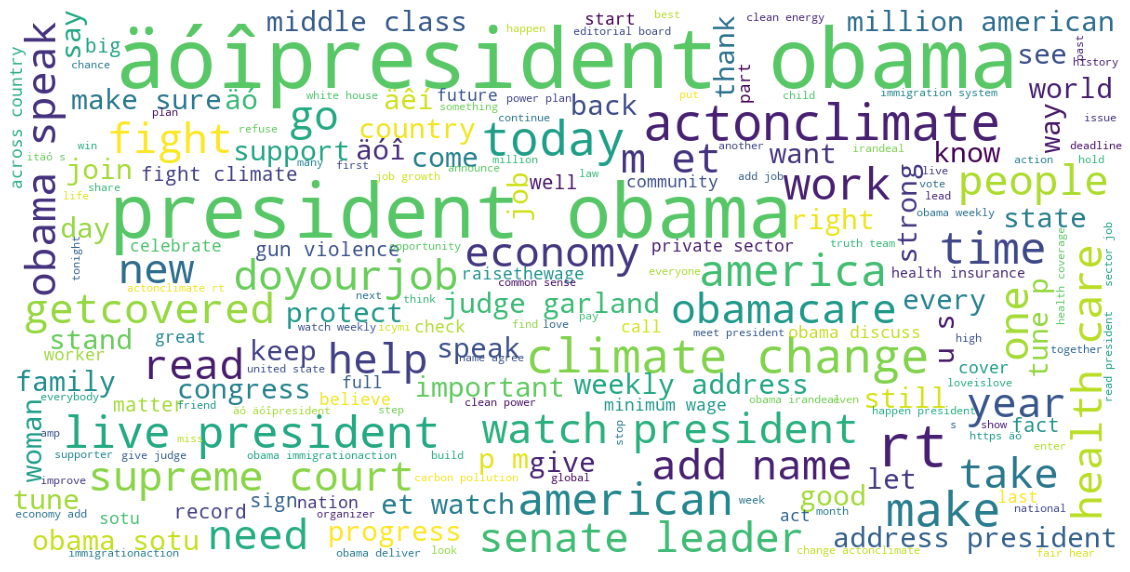

In [28]:
show_wordcloud(all_words_bo)

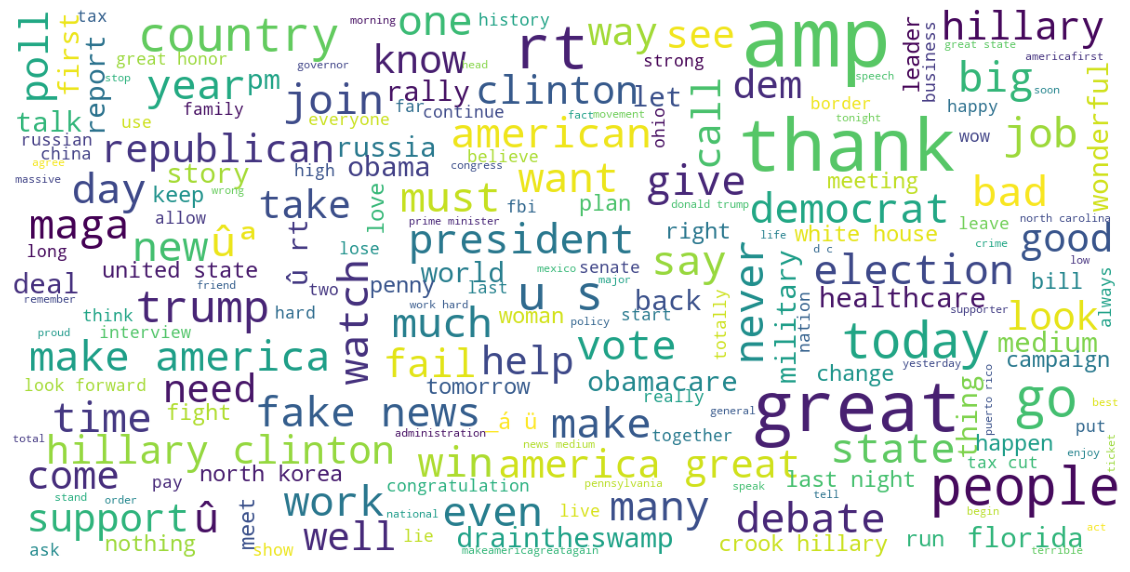

In [29]:
show_wordcloud(all_words_dt)

In [31]:
#type(Counter(ngrams(all_words_bo.split(),5)))

### Barak Obama

In [97]:
Counter(ngrams(all_words_bo.split(),1)).most_common(30)

[(('obama',), 1061),
 (('äóîpresident',), 614),
 (('president',), 596),
 (('rt',), 369),
 (('actonclimate',), 294),
 (('american',), 245),
 (('make',), 238),
 (('change',), 222),
 (('watch',), 211),
 (('get',), 205),
 (('climate',), 199),
 (('work',), 190),
 (('time',), 177),
 (('year',), 174),
 (('health',), 170),
 (('job',), 168),
 (('fight',), 161),
 (('live',), 156),
 (('today',), 154),
 (('senate',), 151),
 (('doyourjob',), 150),
 (('economy',), 149),
 (('take',), 147),
 (('help',), 141),
 (('read',), 132),
 (('speak',), 130),
 (('add',), 128),
 (('million',), 124),
 (('sotu',), 124),
 (('need',), 121)]

In [98]:
Counter(ngrams(all_words_bo.split(),2)).most_common(30)

[(('äóîpresident', 'obama'), 614),
 (('president', 'obama'), 418),
 (('climate', 'change'), 157),
 (('live', 'president'), 124),
 (('watch', 'president'), 99),
 (('senate', 'leader'), 93),
 (('supreme', 'court'), 84),
 (('health', 'care'), 82),
 (('obama', 'speak'), 81),
 (('add', 'name'), 79),
 (('weekly', 'address'), 75),
 (('obama', 'sotu'), 68),
 (('judge', 'garland'), 66),
 (('president', "obama's"), 66),
 (('p.m', 'et'), 64),
 (('address', 'president'), 62),
 (('et', 'watch'), 56),
 (('make', 'sure'), 54),
 (('million', 'american'), 46),
 (('tune', 'p.m'), 43),
 (('fight', 'climate'), 41),
 (('gun', 'violence'), 39),
 (('minimum', 'wage'), 36),
 (('obama', 'discuss'), 35),
 (('across', 'country'), 35),
 (('health', 'insurance'), 34),
 (('change', 'actonclimate'), 34),
 (('job', 'growth'), 33),
 (('actonclimate', 'rt'), 33),
 (('obama', 'irandeal'), 33)]

In [99]:
Counter(ngrams(all_words_bo.split(),3)).most_common(30)

[(('live', 'president', 'obama'), 108),
 (('president', 'obama', 'speak'), 81),
 (('watch', 'president', 'obama'), 79),
 (('äóîpresident', 'obama', 'sotu'), 65),
 (('weekly', 'address', 'president'), 59),
 (('et', 'watch', 'president'), 51),
 (('address', 'president', 'obama'), 50),
 (('p.m', 'et', 'watch'), 44),
 (('tune', 'p.m', 'et'), 43),
 (('fight', 'climate', 'change'), 36),
 (('president', 'obama', 'discuss'), 35),
 (('climate', 'change', 'actonclimate'), 34),
 (('äóîpresident', 'obama', 'irandeal'), 32),
 (('äóîpresident', 'obama', 'immigrationaction'), 29),
 (('president', 'obama', 'deliver'), 28),
 (('äóîpresident', 'obama', 'weekly'), 28),
 (('obama', 'weekly', 'address'), 28),
 (('give', 'judge', 'garland'), 26),
 (('happen', 'president', 'obama'), 24),
 (('clean', 'power', 'plan'), 22),
 (('watch', 'weekly', 'address'), 21),
 (('economy', 'add', 'job'), 21),
 (('äóîpresident', 'obama', 'actonclimate'), 21),
 (('private-sector', 'job', 'growth'), 21),
 (('raise', 'minimum',

### Donald Trump

In [100]:
Counter(ngrams(all_words_dt.split(),1)).most_common(30)

[(('great',), 535),
 (('amp',), 521),
 (('rt',), 358),
 (('thank',), 314),
 (('make',), 236),
 (('people',), 234),
 (('get',), 225),
 (('trump',), 200),
 (('job',), 192),
 (('go',), 190),
 (('america',), 187),
 (('hillary',), 183),
 (('today',), 181),
 (('big',), 175),
 (('state',), 170),
 (('news',), 169),
 (('country',), 161),
 (('american',), 156),
 (('time',), 155),
 (('vote',), 154),
 (('clinton',), 152),
 (('join',), 151),
 (('president',), 148),
 (('u.s',), 145),
 (('new',), 142),
 (('fake',), 140),
 (('say',), 137),
 (('debate',), 132),
 (('medium',), 128),
 (('work',), 125)]

In [101]:
Counter(ngrams(all_words_dt.split(),2)).most_common(30)

[(('fake', 'news'), 117),
 (('make', 'america'), 90),
 (('america', 'great'), 74),
 (('hillary', 'clinton'), 70),
 (('white', 'house'), 47),
 (('united', 'state'), 47),
 (('north', 'korea'), 45),
 (('crook', 'hillary'), 44),
 (('last', 'night'), 41),
 (('look', 'forward'), 38),
 (('great', 'honor'), 35),
 (('news', 'medium'), 33),
 (('puerto', 'rico'), 29),
 (('great', 'state'), 29),
 (('tax', 'cut'), 28),
 (('work', 'hard'), 28),
 (('prime', 'minister'), 28),
 (('north', 'carolina'), 28),
 (('donald', 'trump'), 26),
 (('america', 'safe'), 25),
 (('repeal', 'amp'), 25),
 (('stock', 'market'), 24),
 (('american', 'people'), 24),
 (('honor', 'welcome'), 24),
 (('great', 'job'), 24),
 (('amp', 'replace'), 24),
 (('join', 'live'), 23),
 (('job', 'job'), 22),
 (('bigleaguetruth', 'debate'), 21),
 (('republican', 'senator'), 20)]

In [102]:
Counter(ngrams(all_words_dt.split(),3)).most_common(30)

[(('make', 'america', 'great'), 66),
 (('fake', 'news', 'medium'), 31),
 (('repeal', 'amp', 'replace'), 24),
 (('make', 'america', 'safe'), 22),
 (('together', 'make', 'america'), 19),
 (('get', 'amp', 'vote'), 14),
 (('crook', 'hillary', 'clinton'), 13),
 (('america', 'safe', 'great'), 12),
 (('great', 'honor', 'welcome'), 11),
 (('job', 'job', 'job'), 11),
 (('go', 'make', 'america'), 9),
 (('fake', 'news', 'cnn'), 7),
 (('men', 'amp', 'woman'), 7),
 (('debate', 'bigleaguetruth', 'rt'), 7),
 (('big', 'tax', 'cut'), 6),
 (('welcome', 'prime', 'minister'), 6),
 (('together', 'go', 'make'), 6),
 (('honor', 'welcome', 'president'), 6),
 (('bring', 'back', 'job'), 6),
 (('rt', 'president', 'trump'), 6),
 (('rt', 'fox', 'news'), 6),
 (('story', 'fake', 'news'), 5),
 (('stock', 'market', 'hit'), 5),
 (('election', 'fake', 'news'), 5),
 (('massive', 'tax', 'cut'), 5),
 (('tonight', 'pme', 'enjoy'), 5),
 (('law', 'enforcement', 'officer'), 5),
 (('tax', 'cut', 'amp'), 5),
 (('amp', 'replace',

In [108]:
dfbo.to_csv('BarakObama_New.csv',index=False)

In [109]:
dfdt.to_csv('DonaldTrump_New.csv',index=False)